In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aditi\AppData\Local\Temp\ipykernel_11188\4158687701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START'] = pd.to_datetime(df['START'])
C:\Users\aditi\AppData\Local\Temp\ipykernel_11188\4158687701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yymm'] = df['START'].dt.strftime('%Y')


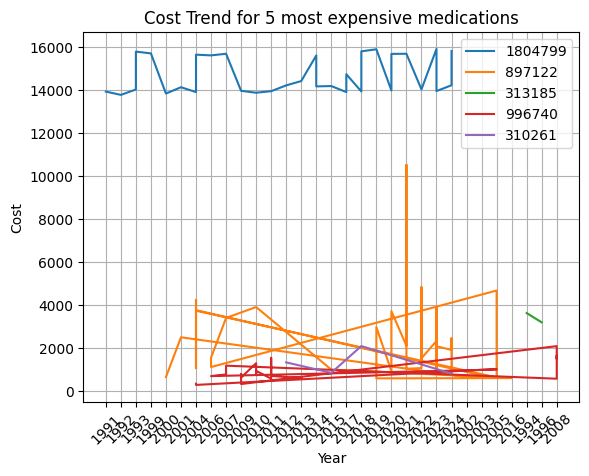

In [71]:
df1 = pd.read_csv('../data/medications.csv')
df = df1[['START','CODE','BASE_COST', 'DESCRIPTION']]

df['START'] = pd.to_datetime(df['START'])
df['yymm'] = df['START'].dt.strftime('%Y')
df=df.drop_duplicates(subset=['yymm', 'CODE', 'BASE_COST'])
df = df.sort_values(by = 'yymm')

df_sorted = df.sort_values(by='BASE_COST', ascending=False)
top5meds = df_sorted['CODE'].unique()[:5]

df['rolling_avg'] = df['BASE_COST'].rolling(window = 12, min_periods = 1).mean()
df['rolling_median'] = df['BASE_COST'].rolling(window = 12, min_periods = 1).median()

medcost = df.groupby('CODE')

# top5meds = df.groupby('CODE')['BASE_COST'].nlargest(10)

# top5meds.head()
# medcost.head()
plt.figure()

for med in top5meds:
    # group = medcost.get_group(med)
    group = df[df['CODE'] ==med]
    plt.plot(group['yymm'], group['rolling_avg'], label=group['CODE'].iloc[0])
    # plt.plot(group['yymm'], group['rolling_median'], label=f'Rolling Median', color='orange')

plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Cost Trend for 5 most expensive medications')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


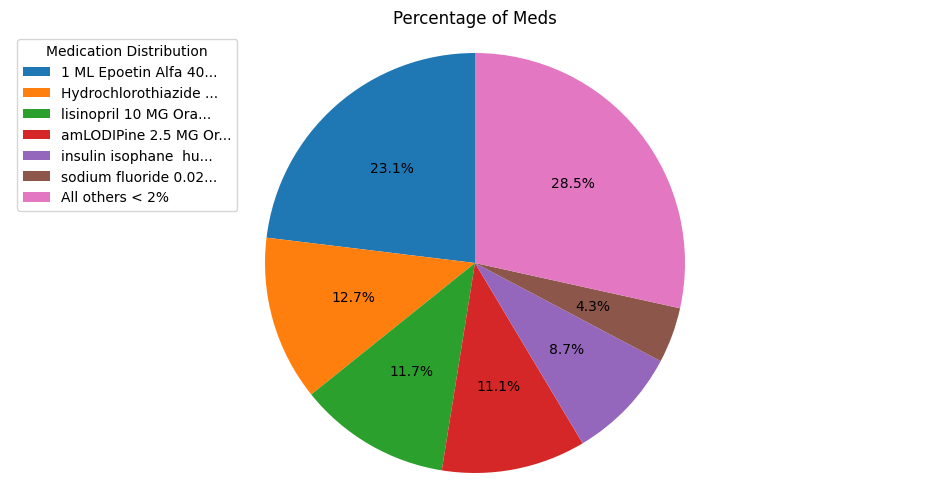

In [ ]:
medication_nums = df1['DESCRIPTION'].value_counts()

threshold = 0.02 * medication_nums.sum()
largemeds = medication_nums[medication_nums >= threshold]
smallmeds = medication_nums[medication_nums < threshold].sum()

medsfinal = pd.concat([largemeds, pd.Series({'All others < 2%': smallmeds})])

labels = [desc[:20] + '...' if len(desc) > 20 else desc for desc in medsfinal.index]

plt.figure(figsize=(12, 6))  # Increase figure size
wedges, texts, autotexts = plt.pie(
    medsfinal,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
)

# Add a legend with descriptions
plt.legend(wedges, labels, title="Medication Distribution", loc="upper left")

plt.title('Percentage of Meds')
plt.axis('equal')
plt.savefig('../plots/medpercent1.png')
plt.show()

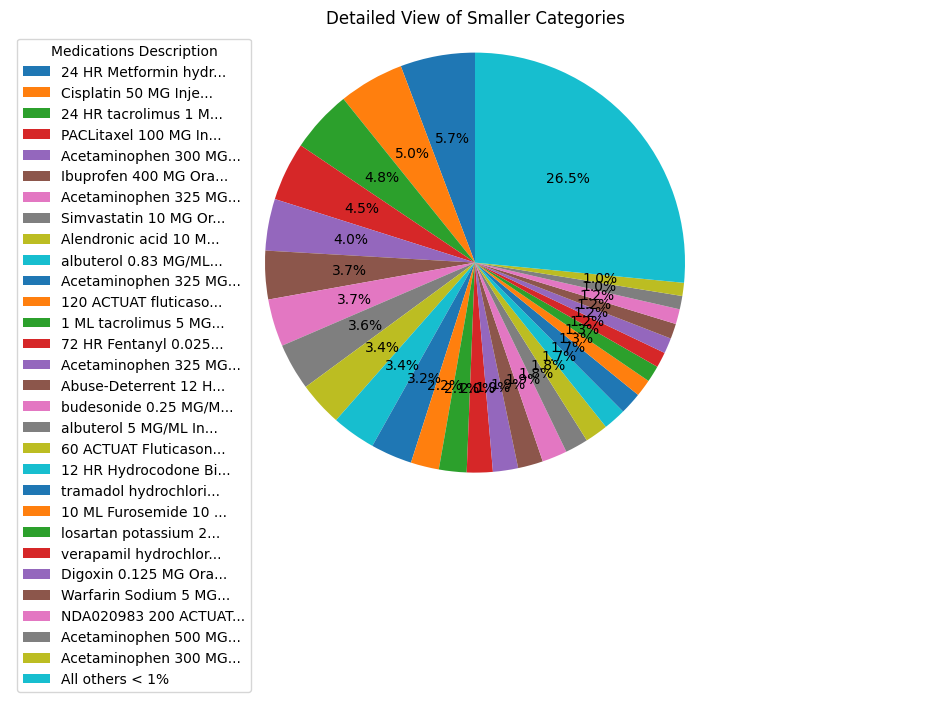

In [94]:
smallmeds = medication_nums[medication_nums < threshold]

evensmaller = smallmeds[smallmeds < 0.01 * smallmeds.sum()].sum()
normalig = smallmeds[smallmeds >= 0.01 * smallmeds.sum()]

smallmeds_final = pd.concat([normalig, pd.Series({'All others < 1%': evensmaller})])

labels = [desc[:20] + '...' if len(desc) > 20 else desc for desc in smallmeds_final.index]

plt.figure(figsize=(12, 6))  # Increase figure size
wedges, texts, autotexts = plt.pie(
    smallmeds_final,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 10},
)

# Add a legend with descriptions
plt.legend(wedges, labels, title="Medications Description", loc="upper left")

plt.title('Detailed View of Smaller Categories')
plt.axis('equal')
plt.savefig('../plots/medpercent2.png')
plt.show()